<a href="https://colab.research.google.com/github/Tejasmallikarjuncj/kmean/blob/main/kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [97]:
import os
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import files
from threading import Thread

IN this section we will be writing the class(kmeans) of kmean clustering

In [98]:
class Kmeans():

  #initialing all the elements in the Kmeans classes
  def __init__(self,Img,iter,cluster):
    self.Img = Img
    self.features = self.Img.shape[1]
    self.size = self.Img.shape[0]
    self.iter = iter
    self.cluster = cluster
    self.centroid = self.create_centroid(self.cluster,self.Img)
    self.dist = np.zeros((self.size,self.cluster),dtype=np.float64)
    self.prev_centroid = dict()

  #cearting the labels and other info about centroids and smaples belonging to that instances
  def create_centroid(self,cluster,Img):
    centroid = dict()
    samples = np.random.choice(self.size,cluster)
    for i in range(1,cluster+1):
      centroid['c'+str(i)] = [Img[samples[(i-1)]],1,np.ones(self.features)]
    return centroid
  
  #calculating the distance for the given instances and centroid
  def cal_distance(self,cent,centroid,inst,interval):
    for k,j in enumerate(inst):
      distances = 0
      for i in range(0,self.features):
        distances += (j[i] - cent[i])**2
      distances = np.sqrt(distances)
      self.dist[(interval[0]+k)][centroid] = distances
    return None

  #distributing the distance calculation among threads
  def sub_distance(self,centriod):
    threadsInner = dict()
    instances = int(self.size/4)
    for i in range(0,3):
      threadsInner['TI'+str(i+1)] = Thread(target=self.cal_distance,kwargs={'cent':self.centroid['c'+str(centriod)][0],'centroid':(centriod-1),'inst':self.Img[i*instances:(i+1)*instances],'interval':(i*instances,(i+1)*instances-1)}) 
    threadsInner['TI4'] = Thread(target=self.cal_distance,kwargs={'cent':self.centroid['c'+str(centriod)][0],'centroid':(centriod-1),'inst':self.Img[3*instances:self.size],'interval':(3*instances,self.size-1)})

    for i in range(0,4):
      threadsInner['TI'+str(i+1)].start()
    for i in range(0,4):
      threadsInner['TI'+str(i+1)].join()
    return None

  #function for comparing the disatnces and the clustering the instances
  def compare(self):
    for i in range(0,self.size):
      centre = np.where(self.dist[i] == np.amin(self.dist[i]))[0][0]
      self.centroid['c'+str(centre+1)][2] += self.Img[i]  
      self.centroid['c'+str(centre+1)][1] += 1
    return None

  #runing whole process in the threaded loop
  def run_distance(self):
    for j in range(0,self.iter):
      self.dist = np.zeros((self.size,self.cluster),dtype=np.float64)
      threads = dict()
      for i in range(1,self.cluster+1):
        threads['T'+str(i)] = Thread(target=self.sub_distance,kwargs={'centriod':i})
      for i in range(1,self.cluster+1):
        threads['T'+str(i)].start()
      for i in range(1,self.cluster+1):
        threads['T'+str(i)].join()

      
      self.compare()



      for i in range(1,self.cluster+1):
        self.centroid['c'+str(i)][0] = self.centroid['c'+str(i)][2]/self.centroid['c'+str(i)][1]
        self.centroid['c'+str(i)][1] = 1
        self.centroid['c'+str(i)][2] = np.ones(self.features)

    for i in range(0,self.size):
      centre = np.where(self.dist[i] == np.amin(self.dist[i]))[0][0]
      Img[i] = self.centroid['c'+str(centre+1)][0]

    return (self.centroid,self.Img) #It returns the modified image and centroid



    
    
      





In [27]:
files.upload()

{}

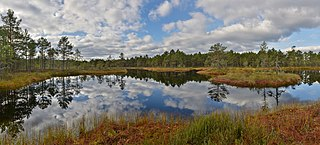

(145, 320, 3)


In [99]:
Img = cv2.imread('./nature.jpg')
cv2_imshow(Img)
print(Img.shape)
type = Img.dtype

In [100]:
Img = Img.astype(np.float64)
dimensions1 = Img.shape[0]
dimensions2 = Img.shape[1]
Img = Img.reshape((-1,3))
cluster = Kmeans(Img=Img,iter=20,cluster=8)
Cenetroid,Img = cluster.run_distance()
print(Cenetroid)

{'c1': [array([ 64.186193  , 103.30083144, 122.99092971]), 1, array([1., 1., 1.])], 'c2': [array([24.31514347, 56.04942777, 68.60424614]), 1, array([1., 1., 1.])], 'c3': [array([145.33429349, 135.42550808, 126.90782525]), 1, array([1., 1., 1.])], 'c4': [array([100.53111433,  95.14790159,  89.18031838]), 1, array([1., 1., 1.])], 'c5': [array([177.81831704, 167.5338929 , 160.26296218]), 1, array([1., 1., 1.])], 'c6': [array([202.43897478, 200.40995389, 198.87320315]), 1, array([1., 1., 1.])], 'c7': [array([11.67885207, 29.60983943, 33.77314657]), 1, array([1., 1., 1.])], 'c8': [array([37.91520092, 77.16230516, 97.43972544]), 1, array([1., 1., 1.])]}


In [101]:
Img = Img.reshape((dimensions1,dimensions2,3))
Img = Img.astype('uint8')

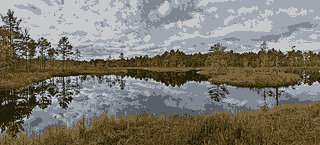

In [102]:
cv2_imshow(Img)